In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5*(x**2) + x + 2 + np.random.normal(0, 1, size=100)

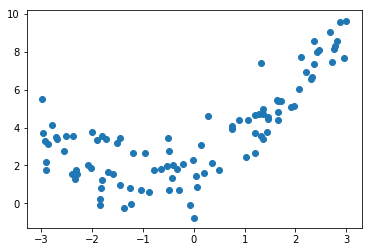

In [3]:
plt.scatter(x, y)
plt.show()

**本页使用均方误差来衡量拟合**

In [4]:
# 均方误差包导入
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


def PolynomialRegression(degree):
    """多项式回归"""
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression()),
    ])

In [6]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

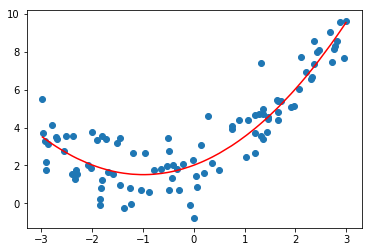

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='red')
plt.show()

## 欠拟合 underfitting
算法所训练的模型不能完整的表述数据的关系

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

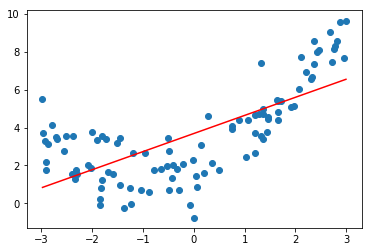

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='red')
plt.show()

## 过拟合 overfitting
算法所训练的模型过多地表达了数据间的噪音关系。

在原有的样本点上表现的很好，但是如果来了新的样本点，不能对新的样本点进行准确的预测。即**模型的泛化能力是很弱的**

In [10]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6828361184883818

显然这里比上面使用二次方程来做预测的结果好

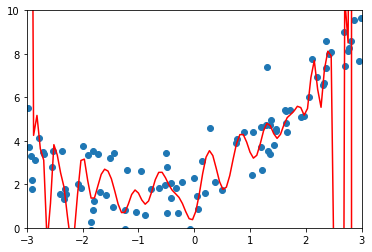

In [11]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

## 使用train test split来避免过拟合
训练模型使用train来训练，预测模型的准确度使用test数据集来预测

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

**线性回归误差**

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

**多项式回归误差 degree=2**

In [14]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297901

**多项式回归误差 degree=10**

In [15]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150715

**多项式回归误差 degree=100**

In [16]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

13453914822.818348